In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,log_loss


In [7]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
x=df.drop(columns="Drug")
y=df["Drug"]
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [10]:
stand=StandardScaler()
X=stand.fit_transform(x)
X

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427],
       [-1.35218642, -1.040833  ,  1.32976279, -0.97043679, -1.03769314],
       [ 0.28388946, -1.040833  ,  1.32976279, -0.97043679,  0.02643885],
       [-0.20087376,  0.96076892,  0.10979693, -0.97043679, -0.70046821],
       [ 0.9504389 ,  0.96076892,  1.32976279, -0.97043679, -0.12676951],
       [-0.07968296,  0.96076892,  0.10979693,  1.03046381,  0.45567206],
       [ 0.16269866, -1.040833  ,  0.10979693, -0.97043679, -0.59916196],
       [-0.62504158, -1.040833  , -1.11016894,  1.03046381,  0.43221897],
       [-0.07968296,  0.96076892,  0.10979693, -0.97043679, -0.09832049],
       [ 1.79877454, -1.040833  ,  0.1

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model=Sequential()
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




In [20]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [16]:
history=model.fit(
    x_train,y_train,
    verbose=1,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early]
    )



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1094 - loss: 0.6199 - val_accuracy: 0.1875 - val_loss: 0.5575
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1094 - loss: 0.4891 - val_accuracy: 0.1875 - val_loss: 0.4612
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1094 - loss: 0.3463 - val_accuracy: 0.1875 - val_loss: 0.3587
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1094 - loss: 0.1893 - val_accuracy: 0.1875 - val_loss: 0.2453
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1094 - loss: 0.0165 - val_accuracy: 0.1875 - val_loss: 0.1166
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1094 - loss: -0.1794 - val_accuracy: 0.1875 - val_loss: -0.0262
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1094 - loss: -0.3994 - val_accuracy: 0.1875 - val_loss: -0.1835
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1094 - loss: -0.6450 - val_accuracy: 0.1875 - val_loss: -0.3

In [17]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1000 - loss: -7.6505
loss: -7.6504926681518555


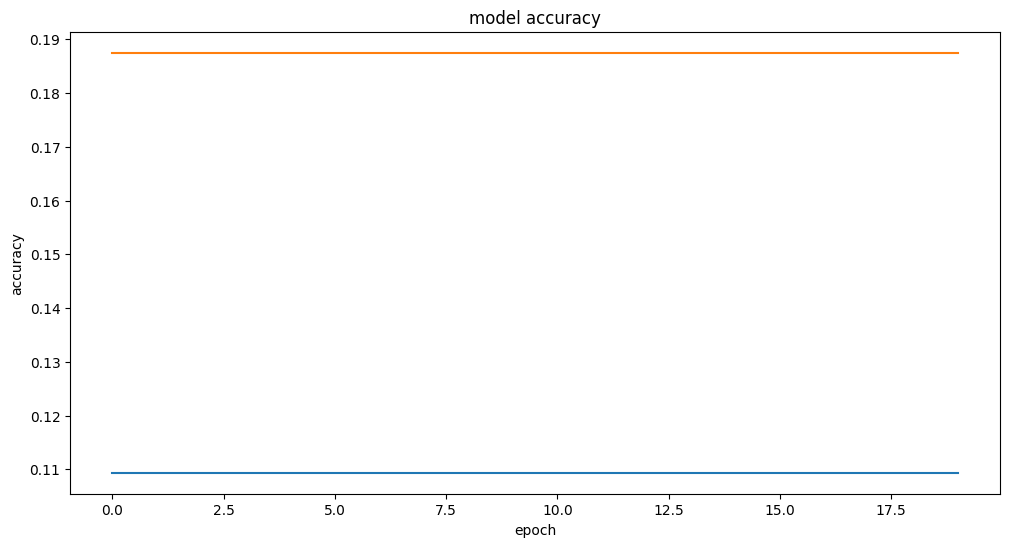

In [18]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy") 
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [21]:
new=np.array([[0,1,1,1,1]])
new=stand.transform(new)
pred=model.predict(new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[0.9999999]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
